In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg
import graphviz 

############################
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,VotingClassifier,RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_predict, KFold, train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree._export import plot_tree

C:\Users\aleon\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
df_Nacional = pd.read_csv('../microdadosEnem_Nacional_Amostragem.csv', sep = ';', encoding='ISO 8859-1')
df_Nacional = df_Nacional.loc[:, ~df_Nacional.columns.str.contains('^Unnamed')]
df_Alagoas = pd.read_csv('../microdadosEnemAlagoas.csv', sep = ';', encoding='ISO 8859-1')
df_Alagoas = df_Alagoas.loc[:, ~df_Alagoas.columns.str.contains('^Unnamed')]
#df_Alagoas.head(5)

In [4]:
# feature-cols vai armazenar todas as colunas exceto a coluna que armazena as
# notas de matemática do participante de Alagoas
feature_cols = [x for x in df_Alagoas.columns if x != 'NU_NOTA_MT']
X = df_Alagoas[feature_cols]
Y = df_Alagoas['NU_NOTA_MT']

In [5]:
# feature-cols vai armazenar todas as colunas exceto a coluna que armazena as
# notas de matemática do participante de Alagoas
feature_cols = [x for x in df_Nacional.columns if x != 'NU_NOTA_MT']
X2 = df_Nacional[feature_cols]
Y2 = df_Nacional['NU_NOTA_MT']

In [6]:
# Leitura dos datasets de treino e teste e criação do df de resposta
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=0)
#test-size = 0.3 define que o tamanho da base de teste é de 30% da base principal, e a base de treino é 70%

#visualizando os tamanhos da bases, teino e teste
print(X.shape, Y.shape, X_train.shape, y_train.shape ,X_test.shape, y_test.shape)

(64605, 40) (64605,) (45223, 40) (45223,) (19382, 40) (19382,)


In [7]:
# Leitura dos datasets de treino e teste e criação do df de resposta
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, Y2, test_size=0.3, random_state=0)
#test-size = 0.3 define que o tamanho da base de teste é de 30% da base principal, e a base de treino é 70%

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numeric_features = ['NU_IDADE', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA','TP_ANO_CONCLUIU', 'TP_ESCOLA',
                    'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',  'Q005']

numeric_transformer = Pipeline(   steps=[ ('scaler', StandardScaler())])

categorical_features = ['Q001', 'Q002', 'Q003', 'Q004','Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011','Q012', 'Q013', 'Q014',
                        'Q015','Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027']

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

X_train = X_train[numeric_features + categorical_features]
X_test = X_test[numeric_features + categorical_features]
X2_train = X_train[numeric_features + categorical_features]
X2_test = X_test[numeric_features + categorical_features]

preprocessing = ColumnTransformer(transformers=[
                                        ('num', numeric_transformer, numeric_features),                                       
                                        ('cat', categorical_transformer, categorical_features),  
])

In [9]:
l1 = []
l2 = []

In [10]:
rf = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42 ))
])
rf.fit(X_train, y_train)  
l1.append(rf)  
#################
rf2 = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42 ))
])
rf2.fit(X2_train, y2_train) 
l2.append(rf2) 

In [11]:
rn = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', MLPRegressor(hidden_layer_sizes=(50, 50),tol=1e-2,max_iter=500, random_state=0))
])
rn.fit(X_train, y_train)
l1.append(rn)
##############
rn2 = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', MLPRegressor(hidden_layer_sizes=(50, 50),tol=1e-2,max_iter=500, random_state=0))
])
rn2.fit(X2_train, y2_train)
l2.append(rn2)

In [12]:
lr =  Pipeline([
    ('preprocess', preprocessing),
    ('regressor', LinearRegression())
])
lr.fit(X_train, y_train)
l1.append(lr)
########3
lr2 =  Pipeline([
    ('preprocess', preprocessing),
    ('regressor', LinearRegression())
])
lr2.fit(X2_train, y2_train)
l2.append(lr2)

In [13]:
dtree = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', DecisionTreeRegressor(random_state=0))
])
dtree.fit(X_train, y_train)
l1.append(dtree)
###################
dtree2 = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', DecisionTreeRegressor(random_state=0))
])
dtree2.fit(X2_train, y2_train)
l2.append(dtree2)


In [14]:
def aplicaPI(reg, X_test, y_test ):
    result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    sorted_idx = result.importances_mean.argsort()
    return (result, sorted_idx)

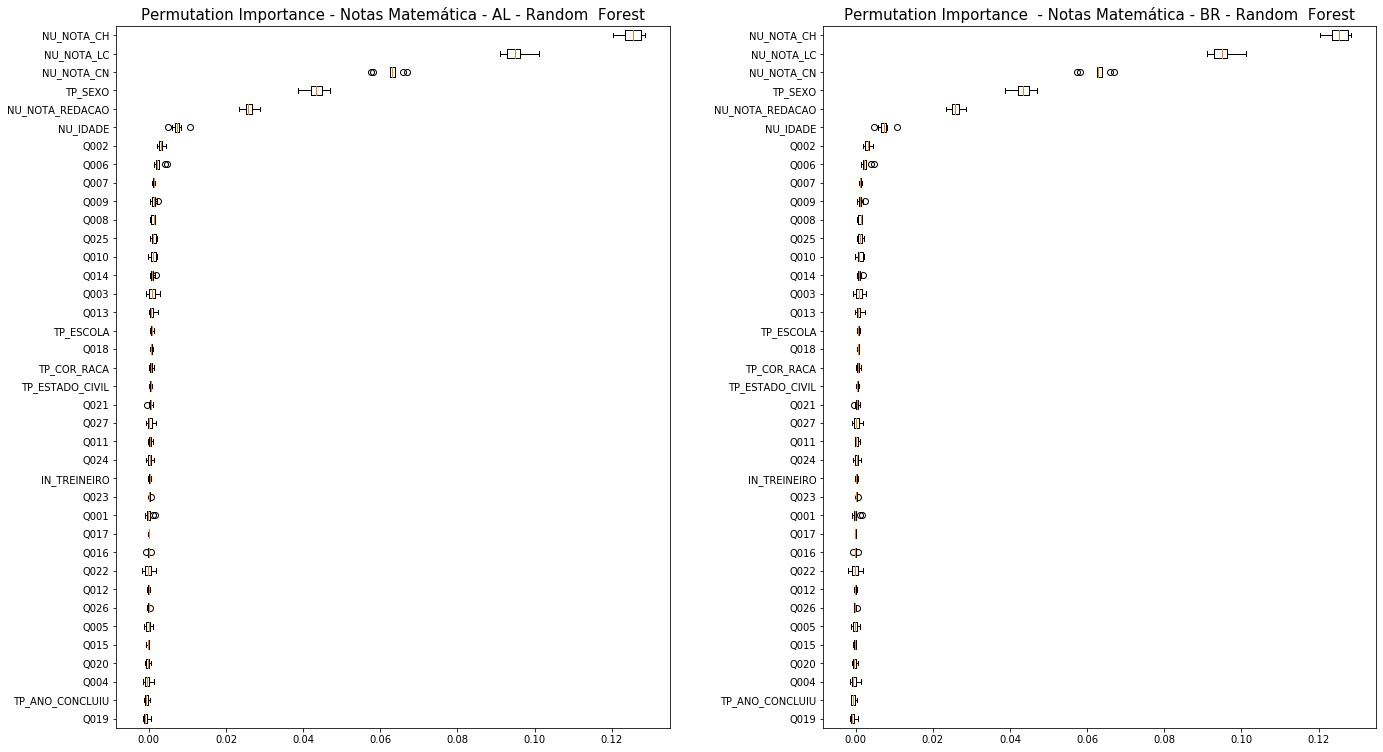

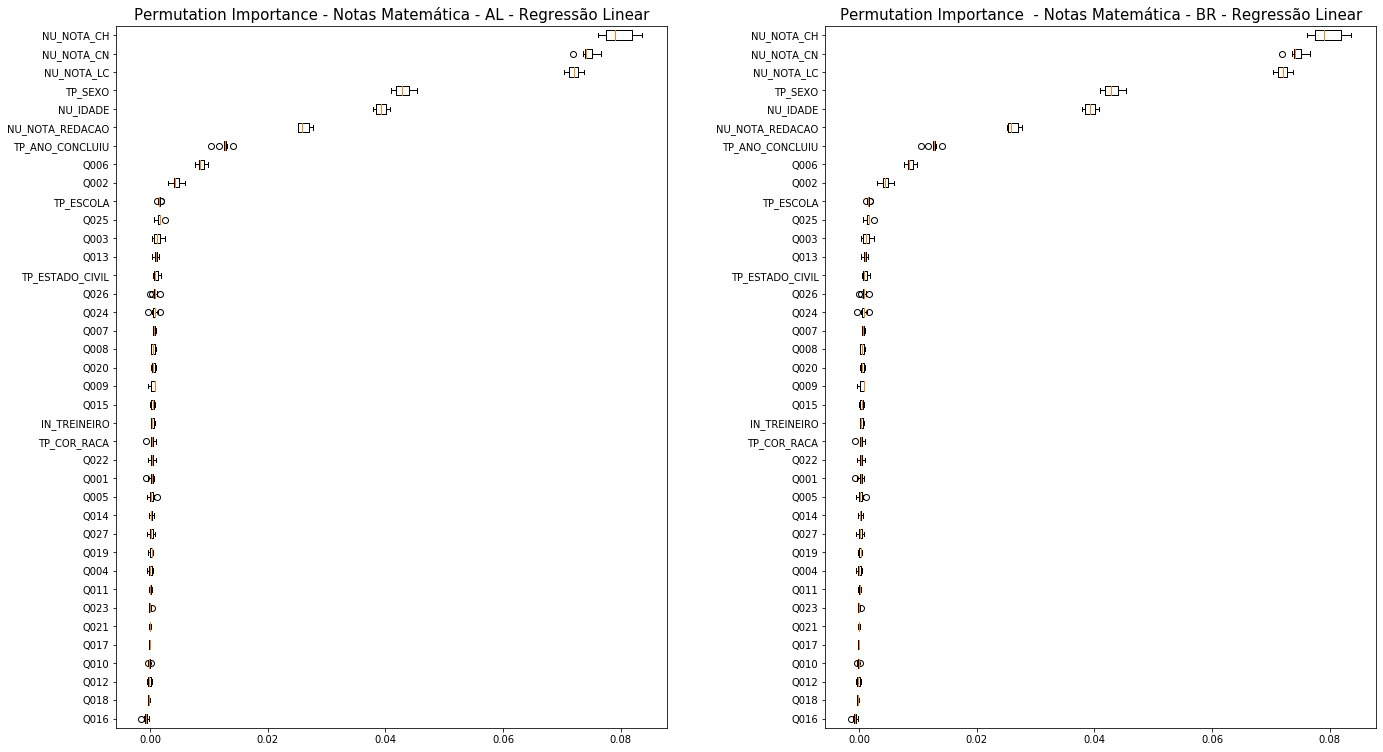

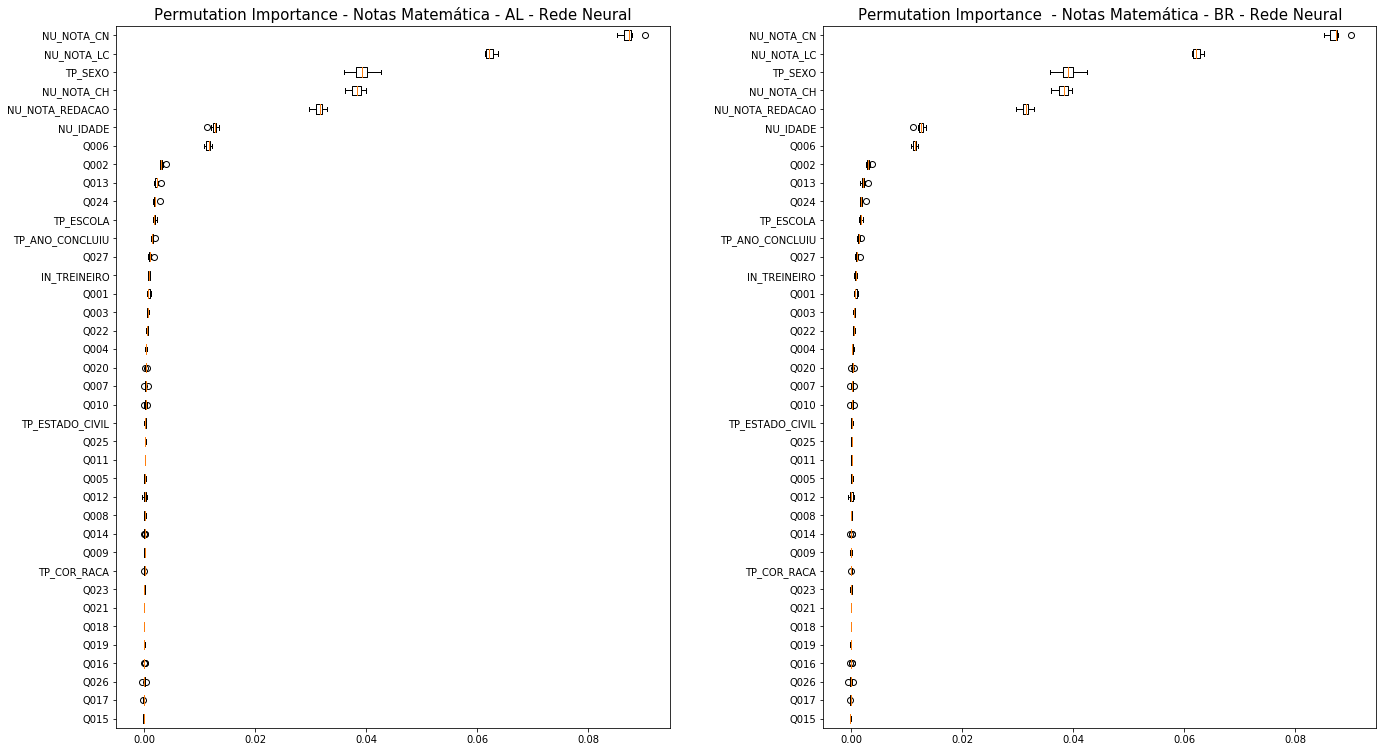

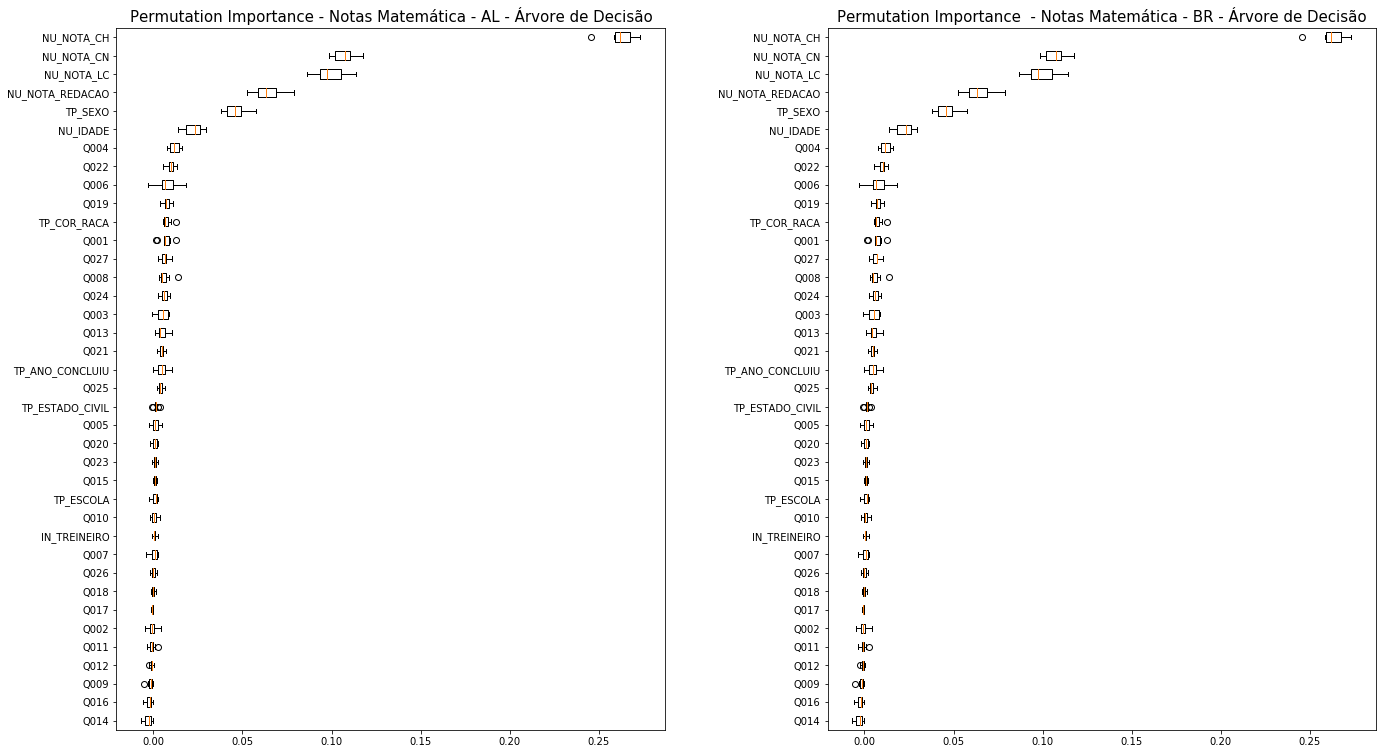

In [17]:
modelos = ['Random  Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de Decisão']

for label, reg1, reg2 in zip(modelos, l1, l2):

    fig = plt.figure(figsize=(20, 15))
    ########primeiro plot
    (result, sorted_idx) = aplicaPI(reg1, X_test, y_test )
    plt.subplot(1, 2, 1)
    plt.boxplot(result.importances[sorted_idx].T,
            vert=False,  labels=X_test.columns[sorted_idx])
    plt.title("Permutation Importance - Notas Matemática - AL - "+ label, fontsize=15)

    ############ segundo plot
    (result, sorted_idx) = aplicaPI(reg2, X2_test, y2_test )
    plt.subplot(1, 2, 2)
    plt.boxplot(result.importances[sorted_idx].T,
            vert=False,  labels=X_test.columns[sorted_idx])
    plt.title("Permutation Importance  - Notas Matemática - BR - " + label, fontsize=15 )

    fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
    plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
    #fig.tight_layout()
    plt.savefig('imagens/PI_RF_MT.png', format='png')
    plt.show()

In [ ]:
A features com maior permutation inportances para os modelos 
* Random Forest
NU_NOTA_CH
NU_NOTA_LC
NU_NOTA_CN
TP_SEXO
NU_NOTA_REDACAO
NU_IDADE
Q002
Q006
Q007
Q009
* Árvore de Decisão
NU_NOTA_CH
NU_NOTA_CN
NU_NOTA_LC
NU_NOTA_REDACAO
TP_SEXO
NU_IDADE
Q004
Q022
Q003
Q013


* Rgressão Linear
NU_NOTA_CH
NU_NOTA_CN
NU_NOTA_LC
TP_SEXO
NU_IDADE
NU_NOTA_REDACAO
TP_ANO_CONCLUIU
Q006
Q002
TP_ESCOLA

* Rede Neural
NU_NOTA_CN
NU_NOTA_LC
TP_SEXO
NU_NOTA_CH
NU_NOTA_REDACAO
NU_IDADE
Q006
Q002
Q003
Q024

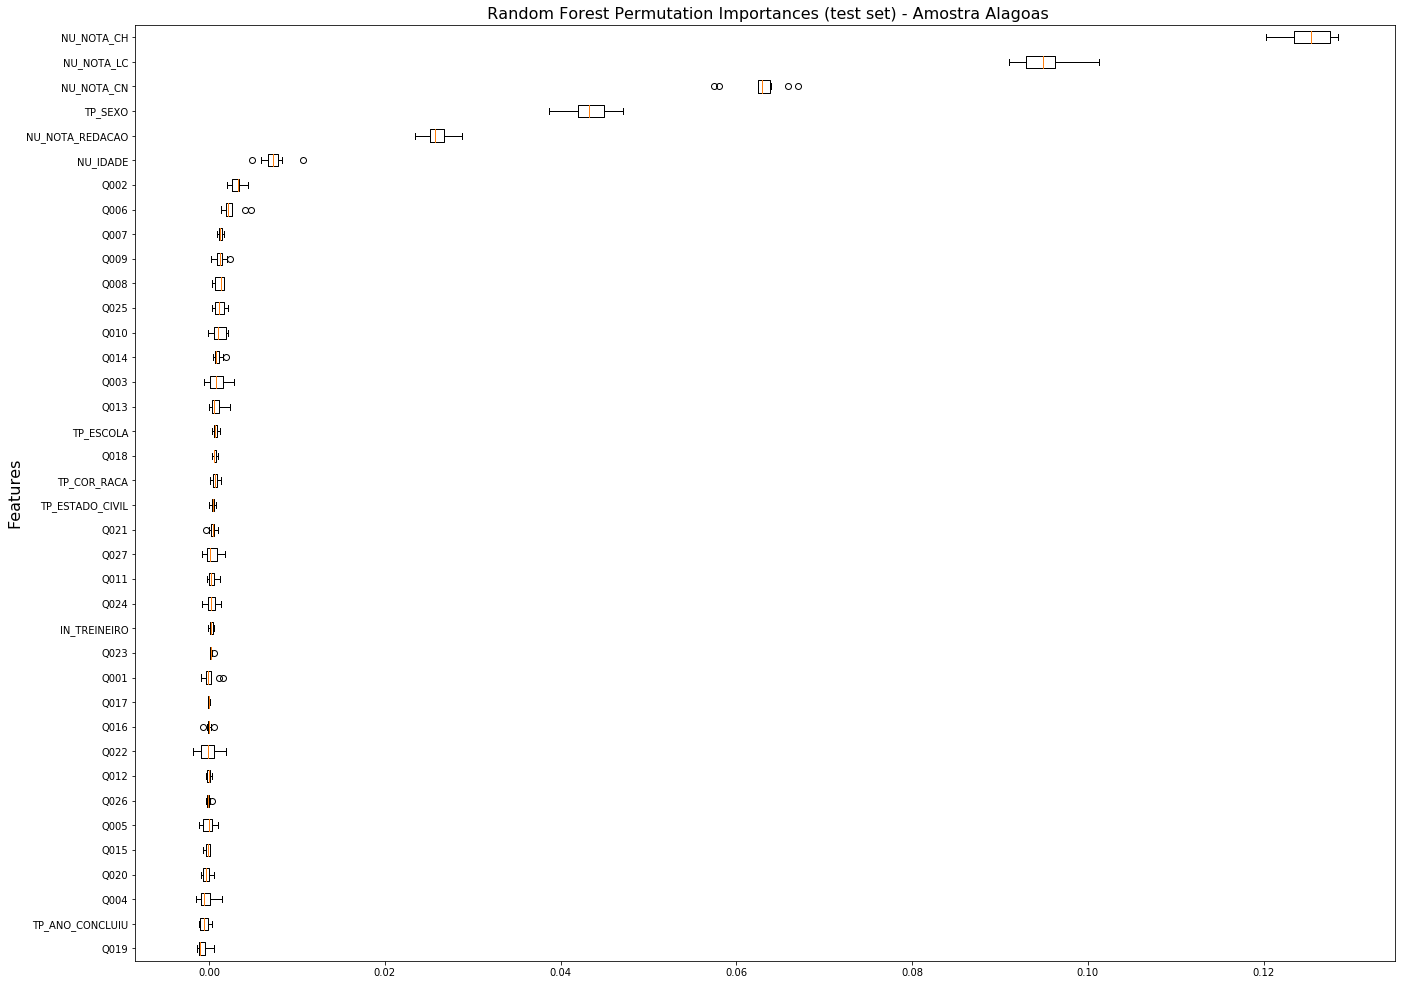

In [14]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Random Forest Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_RF_MT_AL.png', format='png')

plt.show()

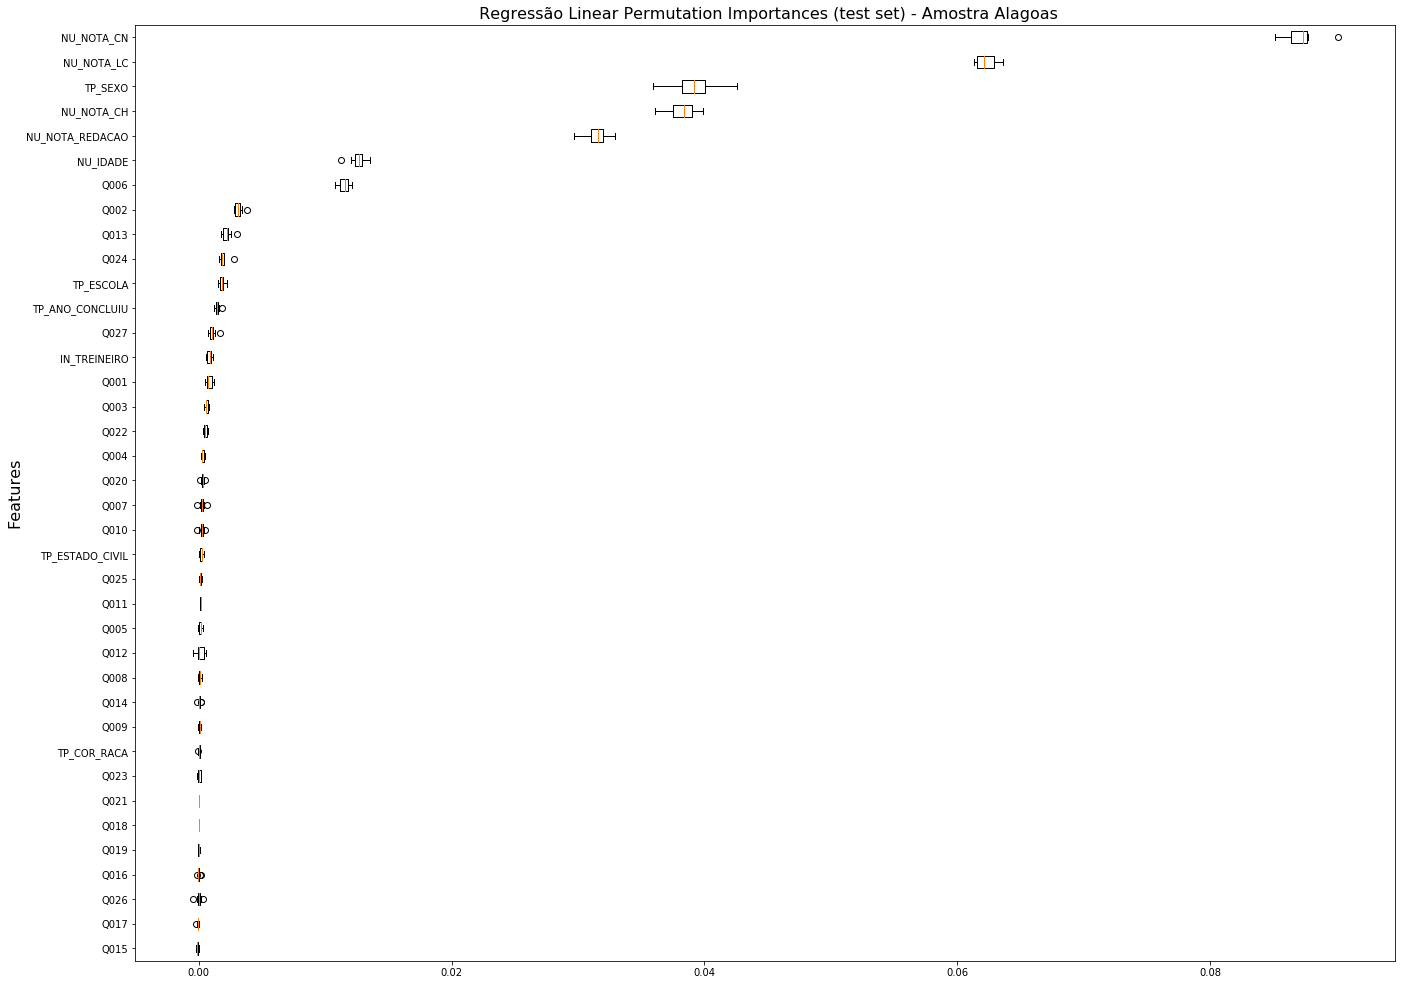

In [15]:
result = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Regressão Linear Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_LR_MT_AL.png', format='png')

plt.show()

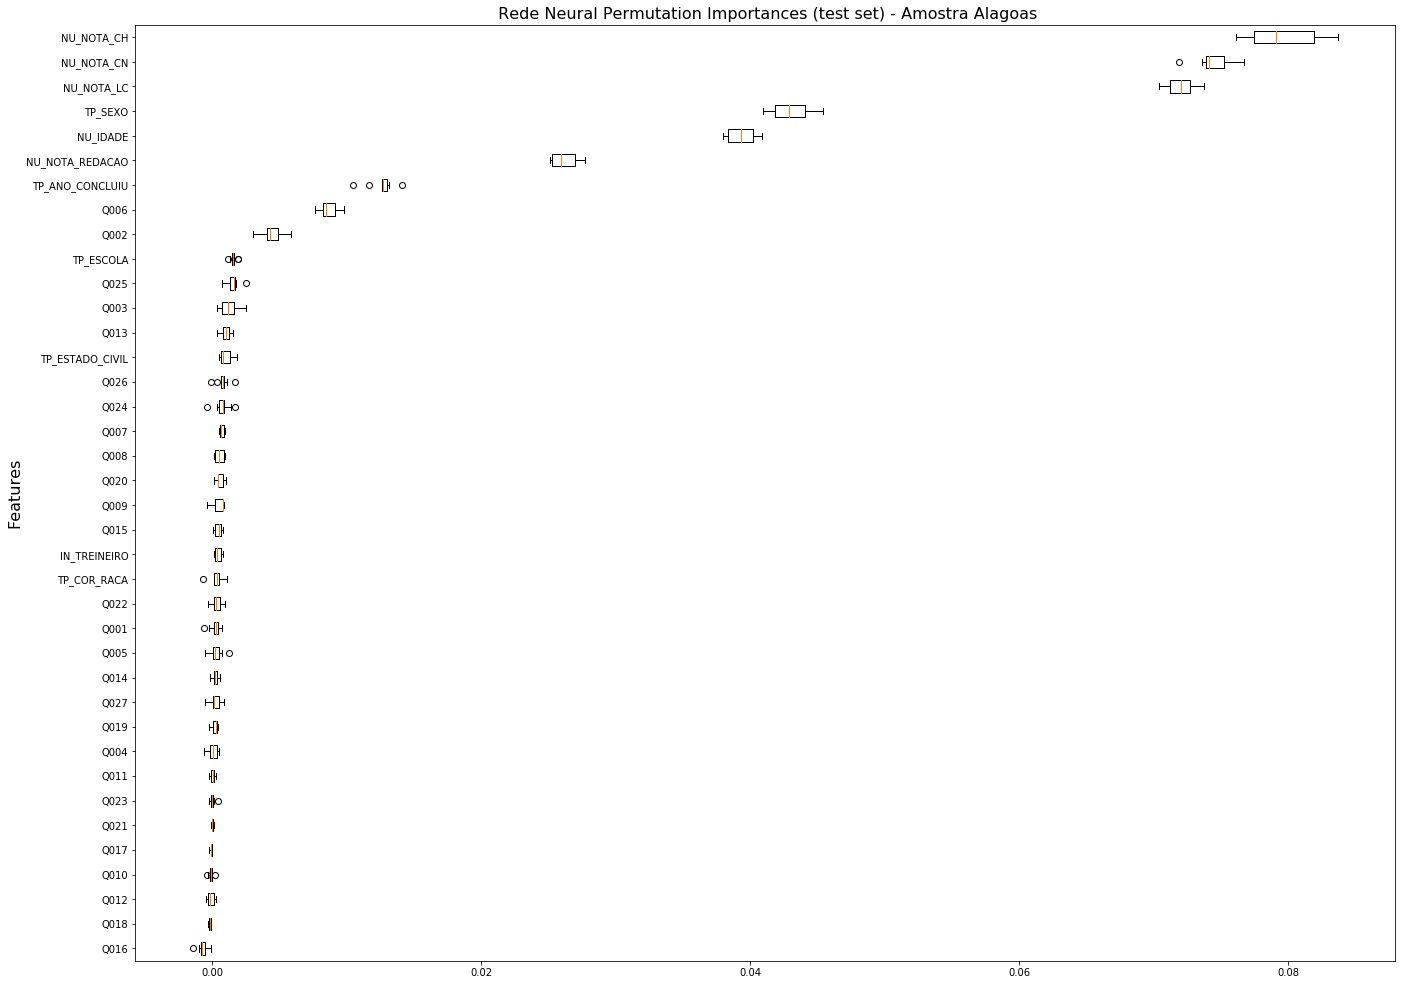

In [16]:
result = permutation_importance(rn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Rede Neural Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_RN_MT_AL.png', format='png')

plt.show()

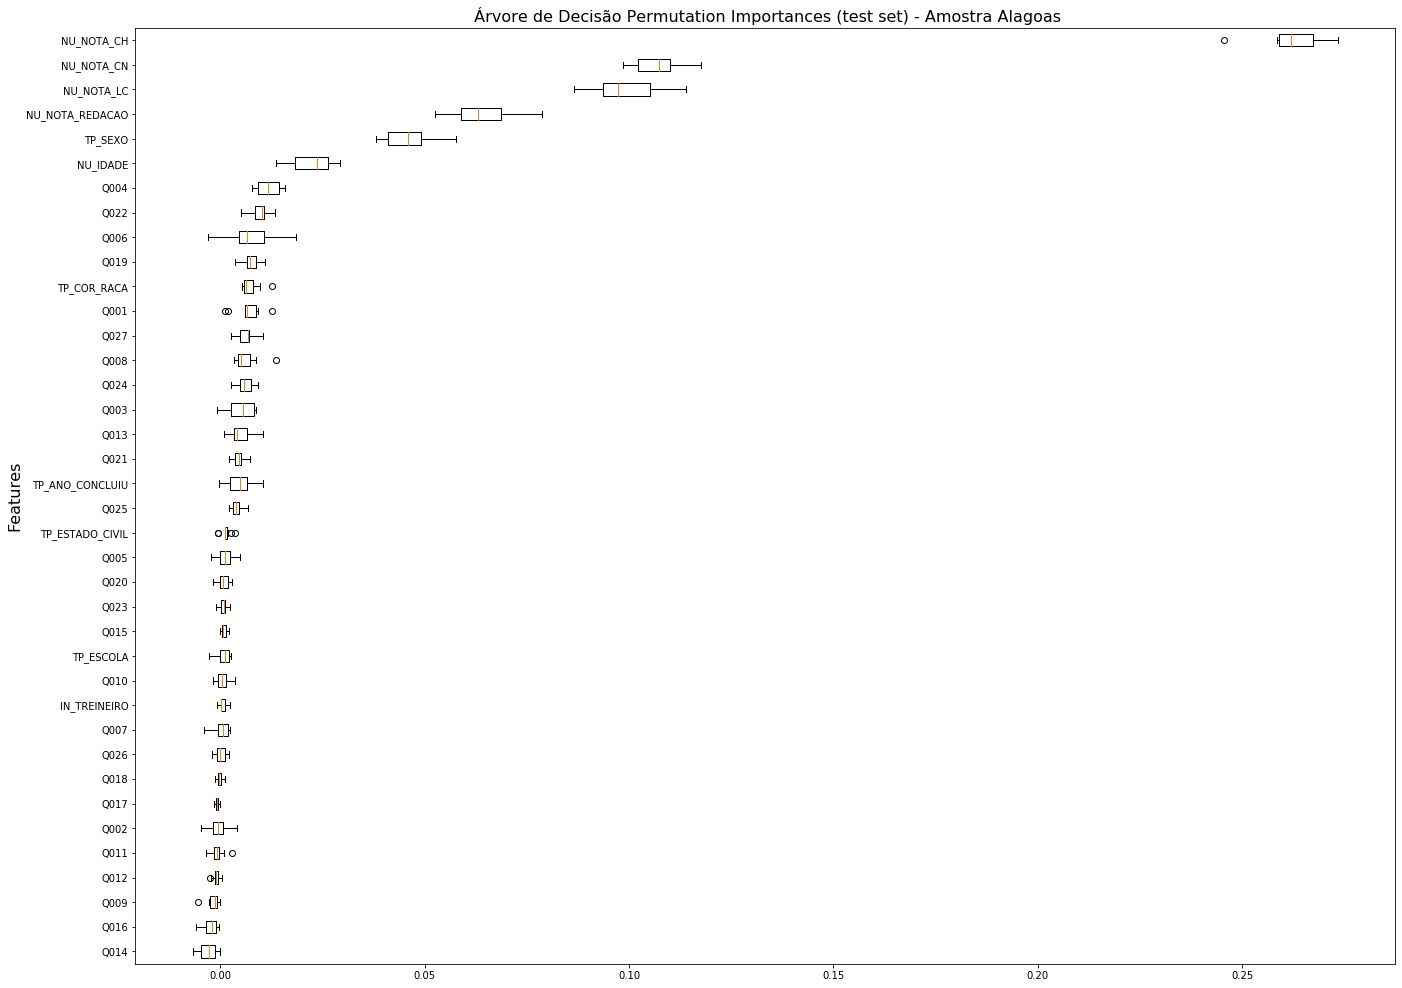

In [17]:
result = permutation_importance(dtree, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Árvore de Decisão Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_DT_MT_AL.png', format='png')

plt.show()